# That is the project that explores LeetCode Data.
## It will show which type of questions are most liked, which are the hardest and which topics you should concentrate on while learning. Have fun exploring!
---
## Let's import pandas and see what's the dataset like

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("leetcode_dataset - lc.csv")

In [3]:
df.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


## Ok, we have quite a lot of data. First thing that I want to do is to find out what questions are the hardest?

In [4]:
hardest_question = df[df.acceptance_rate.min()==df.acceptance_rate]
hardest_question.title.to_string(index=False), hardest_question.url.to_string(index=False)

('Strong Password Checker',
 'https://leetcode.com/problems/strong-password-c...')

In [98]:
h_qs = df.groupby(['acceptance_rate']).min().head()
h_qs

/var/folders/9j/ltkckt2s4zsfxrks574_vgfm0000gn/T/ipykernel_66540/20730141.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  h_qs = df.groupby(['acceptance_rate']).min().head()


,id,title,description,is_premium,difficulty,frequency,url,discuss_count,accepted,submissions,likes,dislikes,rating,asked_by_faang
acceptance_rate,,,,,,,,,,,,,,
13.9,420,Strong Password Checker,A password is considered strong if the below c...,0,Hard,80.0,https://leetcode.com/problems/strong-password-...,166,17.5K,126.1K,317,939,25,1
15.0,1622,Fancy Sequence,Write an API that generates fancy sequences us...,0,Hard,12.3,https://leetcode.com/problems/fancy-sequence,70,3.8K,25.3K,166,53,76,1
15.7,8,String to Integer (atoi),"Implement the `myAtoi(string s)` function, whi...",0,Medium,56.0,https://leetcode.com/problems/string-to-intege...,999,716.1K,4.6M,189,479,28,1
16.0,65,Valid Number,A valid number can be split up into these comp...,0,Hard,54.1,https://leetcode.com/problems/valid-number,999,199.5K,1.2M,902,5572,14,1
16.9,29,Divide Two Integers,"Given two integers `dividend` and `divisor`, d...",0,Medium,50.5,https://leetcode.com/problems/divide-two-integers,999,359.2K,2.1M,1727,6727,20,1


## Ok, now we know which question is the hardest. Go on and try to solve it...
---
## Right, now let's do something else. I want to know the distribution of easy, medium and hard questions on Leetcode

In [81]:
hard = len(df[df.difficulty=='Hard'])
medium = len(df[df.difficulty=='Medium'])
easy = len(df[df.difficulty=='Easy'])
hard, medium, easy

(385, 963, 477)

([<matplotlib.patches.Wedge at 0x1205458d0>,
 [Text(0.7495440069432847, 0.8050986161057572, 'Easy'),
  Text(-1.0862341231319463, -0.17348034396948855, 'Medium'),
  Text(0.8671354475251148, -0.6768132058739834, 'Hard')],
 [Text(0.40884218560542795, 0.4391446996940493, '26.1%'),
  Text(-0.5924913398901525, -0.09462564216517556, '52.8%'),
  Text(0.4729829713773353, -0.36917083956762725, '21.1%')])

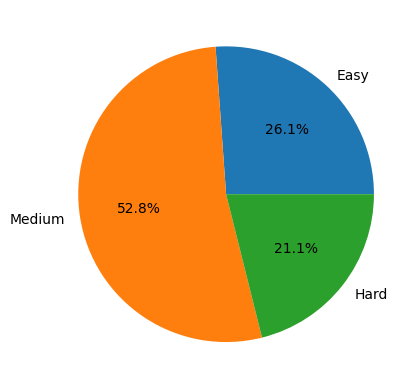

In [7]:
labels = 'Easy', 'Medium', 'Hard'
values = [easy,medium,hard]
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')

## It seems that the distribution is sensible. Most people should be capable of solving medium tasks
---
## Now i want to see which companies contribute most questions to Leetcode

In [8]:
filtered_rows = list(df.companies.dropna())


['Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,Facebook,Oracle,Uber,Expedia,Twitter,Nagarro,SAP,Yahoo,Cisco,Qualcomm,tcs,Goldman Sachs,Yandex,ServiceNow',
 'Bloomberg,Microsoft,Amazon,Google,Facebook,Apple,Adobe,Paypal,Coupang,Oracle,Uber,VMware,Yahoo',
 'Amazon,Bloomberg,Microsoft,Facebook,Apple,Adobe,eBay,Goldman Sachs,Google,Alation,VMware,Oracle,ByteDance,Yahoo,Uber,SAP,Salesforce,Coupang,Splunk,Spotify',
 'Amazon,Goldman Sachs,Facebook,Microsoft,Apple,Adobe,Google,Bloomberg,Zillow,Uber,Flipkart,Paypal',
 'Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,Google,Oracle,Goldman Sachs,Yandex,Qualcomm',
 'Microsoft',
 'Amazon,Google,Apple,Facebook,Bloomberg,American Express,Microsoft,Adobe,Uber',
 'Facebook,Amazon,Microsoft,Google,Goldman Sachs,Apple,Adobe,Bloomberg,Intel',
 'Microsoft,Adobe,Bloomberg,Facebook,Google,Yahoo',
 'Facebook,Amazon,Microsoft,Google,Adobe,Coursera,Apple',
 'Amazon,Google,Microsoft,Facebook,Goldman Sachs,Adobe,Apple',
 'Amazon,Bloomberg,Microsoft,Adobe,Google,App

In [9]:

companies = [x for i in range(len(filtered_rows)) for x in filtered_rows[i].split(",")]
set_companies = list(set(companies))


['Pony.ai',
 'Bloomreach',
 'Indeed',
 'Asana',
 'Toptal',
 'GSN Games',
 'National Instruments',
 'edabit',
 'Intel',
 'Virtu Financial',
 'MachineZone',
 'Zalando',
 'Sapient',
 'Uber',
 'AllinCall',
 'JP Morgan',
 'Walmart',
 'DoorDash',
 'HRT',
 'American Express',
 'Wish',
 'Paypal',
 'Coursera',
 'Barclays',
 'Point72',
 'Ajira',
 'Dream11',
 'Cisco',
 'Leap Motion',
 'Alibaba',
 'Yahoo',
 'Redfin',
 'NetEase',
 'Coupang',
 'Nvidia',
 'MAQ Software',
 'Startup',
 'Qualtrics',
 'Duolingo',
 'Mathworks',
 'Tencent',
 'Salesforce',
 'Robinhood',
 'Cloudera',
 'Twilio',
 'Citrix',
 'Citadel',
 'Flipkart',
 'Hulu',
 'Brillio',
 'Cashfree',
 'Audible',
 'SoundHound',
 'DiDi',
 'ByteDance',
 'Turvo',
 'Booking',
 'Hotstar',
 'Garena',
 'Spotify',
 'JPMorgan',
 'Epic Systems',
 'peak6',
 'Kakao',
 'Sprinklr',
 'PayTM',
 'Palantir Technologies',
 'UiPath',
 'Works Applications',
 'Postmates',
 'Microstrategy',
 'Intuit',
 'Walmart Labs',
 'Pinterest',
 'Oracle',
 'GoDaddy',
 'Traveloka',


In [23]:
labels =[]
n = 15
for i in set_companies:
    if companies.count(i)>n:
        labels.append(i)
    else:
        labels.append("")

In [96]:
companies_share = {
    'companies': labels,
    'number_of_inclusions': [companies.count(x) for x in set_companies],
    'colors': [(random.random(),random.random(),random.random()) for x in set_companies]
}


In [25]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)

            ax.text(*self.bubbles[i, :2], labels[i],
                        horizontalalignment='center', verticalalignment='center')

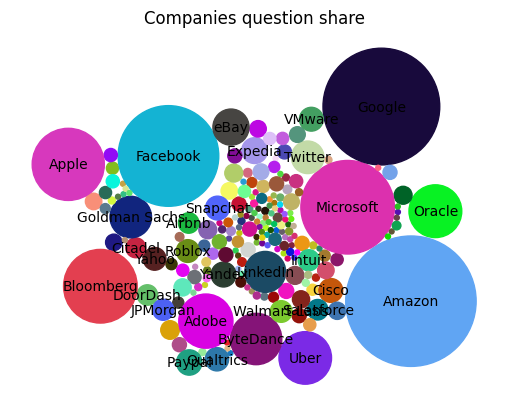

In [52]:
bubble_chart = BubbleChart(area=companies_share['number_of_inclusions'],
                           bubble_spacing=0.1)
bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, companies_share['companies'], companies_share['colors'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Companies question share')

plt.show()

## This looks interseting but not perfect at all. We can easily see the leaders, but there is no strict algorythm which companies can we see on that bubble map and which we can not. The thing is  - I just write text only if the company has contributed more than N questions
---
## By the way the code for bubbles that do not overlap is completely and honestly stolen from here: <https://matplotlib.org/stable/gallery/misc/packed_bubbles.html>

## We can see that top 4 companies in this dataset are Amazon, Google, Facebook and Microsoft
---
## Let's see which problems they prefer to give on interviews and compare it to the overall tendency

In [66]:
category_names = ['Easy', 'Medium', 'Hard']
top_companies = ['Amazon', 'Google','Facebook','Microsoft']
results =dict()
for comp in top_companies:
    results[comp]=[len(df[(df.companies.str.contains(comp, regex=False)) & (df.difficulty==x)]) for x in category_names]
results['Overall'] = [easy,medium,hard]
results

{'Amazon': [176, 382, 132],
 'Google': [99, 300, 154],
 'Facebook': [108, 244, 59],
 'Microsoft': [92, 206, 57],
 'Overall': [477, 963, 385]}

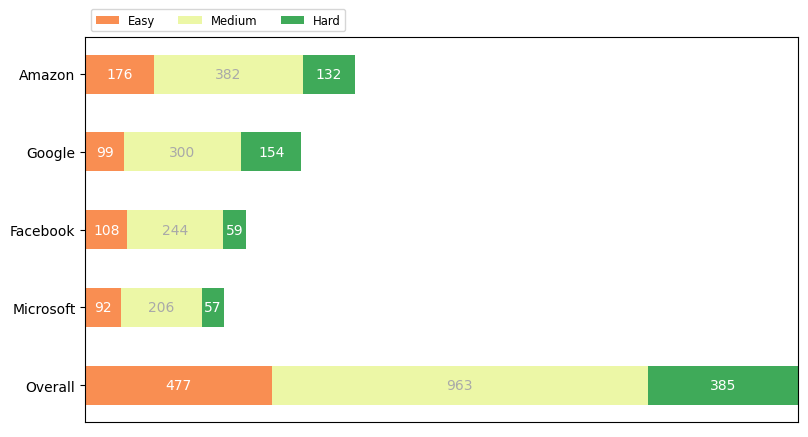

In [67]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.25, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color, align='center')

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

## Hooray, distribution is shown. Now we'll do the same thing but with pie charts and compare it to the first pie chart in that Noteook

([<matplotlib.patches.Wedge at 0x15d2dcfa0>,
 [Text(0.7495440069432847, 0.8050986161057572, 'Easy'),
  Text(-1.0862341231319463, -0.17348034396948855, 'Medium'),
  Text(0.8671354475251148, -0.6768132058739834, 'Hard')],
 [Text(0.40884218560542795, 0.4391446996940493, '26.1%'),
  Text(-0.5924913398901525, -0.09462564216517556, '52.8%'),
  Text(0.4729829713773353, -0.36917083956762725, '21.1%')])

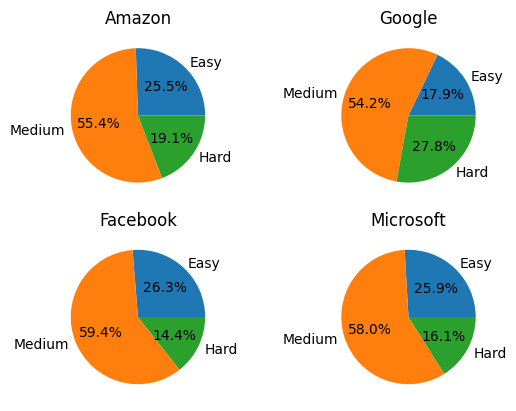

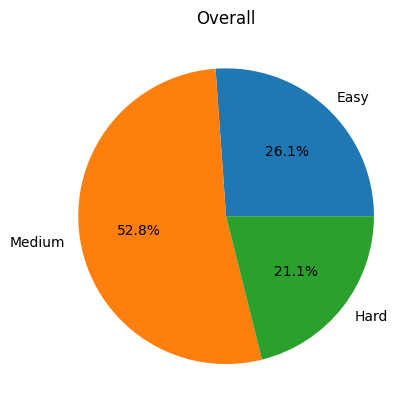

In [95]:
fig, axs = plt.subplots(2,2)
count=0
for i in range(2):
    for j in range(2):
        axs[i,j].set_title(top_companies[count])
        axs[i,j].pie(results[top_companies[count]], labels=category_names, autopct='%1.1f%%')
        count+=1
fig, ax = plt.subplots()
ax.set_title('Overall')
ax.pie(values, labels=category_names, autopct='%1.1f%%')



## So Google has the hardest questions, while Facebook is a bit easier to get through. But overall, the situation is the sbasically the same in all compaies, not even in top ones